In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [48]:

df = pd.read_excel('Book1.xlsx')
df.head()

,Name,Dependant,Wives,Projects
0,Kim,1,2,6
1,Sameer,3,3,5
2,Jones,2,4,10
3,John,1,1,11


In [49]:
# Extract independent variables (X) and dependent variable (Y)
X = df[['Dependant', 'Wives']]
Y = df['Projects']

In [50]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [51]:
# Make predictions
predictions = model.predict(X)

In [52]:
# Predictions on the same data
y_pred = model.predict(X)

#Regression coefficients (Bo, B1, B2)
intercept = model.intercept_ #Bo
coefficients = model.coef_ #B1, B2

# Calculate R-squared Coefficient of determination
r2 = r2_score(Y, predictions)

# Calculate Adjusted R-squared
n = len(Y)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Sum Squared Error (SSE) and SSR
sse = np.sum((Y - predictions)**2)
ssr = np.sum((y_pred - np.mean(Y)) ** 2)

print(f'\n1. Regression coefficients:')
print(f'   Intercept (Bo): {intercept:.4f}')
print(f'   Coefficient for X1 | Dependant (B1): {coefficients[0]:.4f}')
print(f'   Coefficient for X2 | Wives (B2): {coefficients[1]:.4f}')

# Print R-squared, Adjusted R-squared, and SSE
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')
print(f'Sum Squared Error (SSE): {sse:.4f}')


1. Regression coefficients:
   Intercept (Bo): 10.0000
   Coefficient for X1 | Dependant (B1): -2.0000
   Coefficient for X2 | Wives (B2): 0.6000
R-squared: 0.2615
Adjusted R-squared: -1.2154
Sum Squared Error (SSE): 19.2000


In [53]:
# Print a table with predicted Y
result_df = pd.DataFrame({'Name':df['Name'],'No of Dependant':df['Dependant'], 'No of Wives': df['Wives'], 'Done Projects | Actual Y': Y, 'Y_predicted': predictions})
# Add SSE and SSR to the DataFrame
result_df['SSE'] = sse
result_df['SSR'] = ssr

print('\nTable with Predicted Y:')
print(result_df)


Table with Predicted Y:
     Name  No of Dependant  No of Wives  Done Projects | Actual Y  \
0     Kim                1            2                         6   
1  Sameer                3            3                         5   
2   Jones                2            4                        10   
3    John                1            1                        11   

   Y_predicted   SSE  SSR  
0          9.2  19.2  6.8  
1          5.8  19.2  6.8  
2          8.4  19.2  6.8  
3          8.6  19.2  6.8  


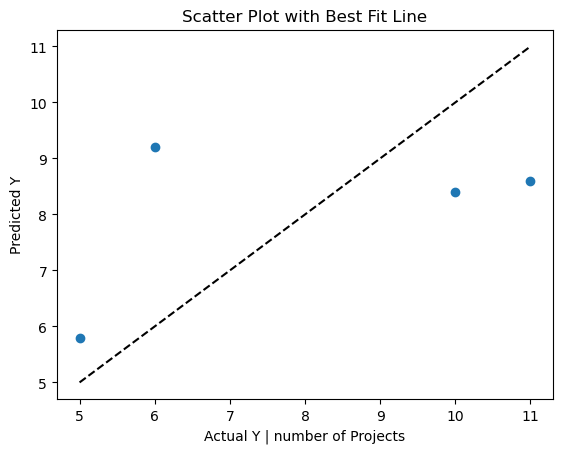

In [54]:
# Plot scatter plot with the best fit line
plt.scatter(Y, predictions)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], '--k')  # Best fit line
plt.xlabel('Actual Y | number of Projects')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot with Best Fit Line')
plt.show()

In [55]:

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.   0.6]
Intercept: 10.0


In [56]:
# New data for prediction for X1 and X2
new_data = np.array([
    [4, 5],
    [2, 3],
])
# Make predictions
predictions = model.predict(new_data)
print("Predictions:", predictions)

Predictions: [5.  7.8]


C:\Users\shamim\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
# Predictions on the same data
y_pred = model.predict(X)

# Evaluate model accuracy
r2 = r2_score(Y, y_pred)
r2

0.2615384615384617

In [60]:
# Calculate residuals
predictions = model.predict(X)
residuals = Y - predictions
# Create a new DataFrame to store residuals
residuals_df = pd.DataFrame({'Actual': Y, 'Predicted': predictions, 'Residuals': residuals})
 # Print the residuals DataFrame
residuals_df

,Actual,Predicted,Residuals
0,6,9.2,-3.2
1,5,5.8,-0.8
2,10,8.4,1.6
3,11,8.6,2.4


C:\Users\shamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


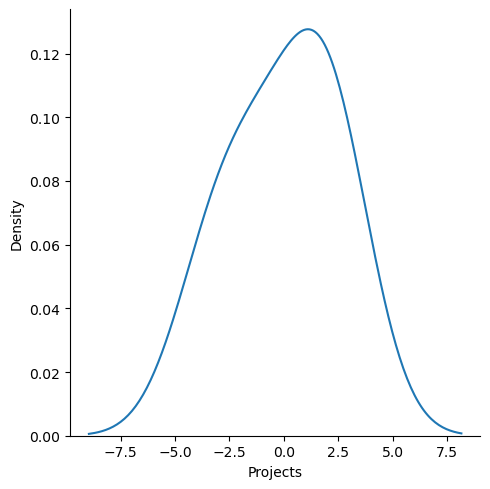

In [61]:
sns.displot(residuals,kind='kde')